In [16]:
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

In [2]:
5*0.01/1e3/3e8

1.6666666666666667e-13

## Run DFCSR

In [3]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')

In [4]:
testCSR.run()

Calculating CSR at s= 0.05


G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:692: RuntimeWarning: invalid value encountered in divide
  CSR_integrand_z = CSR_numerator1 /r_minus_rp + (CSR_numerator2) / r_minus_rp
G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:722: RuntimeWarning: invalid value encountered in divide
  W1 = scale_term * part1 / (r_minus_rp * r_minus_rp * r_minus_rp) * density_ret


--- 2.482243537902832 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2024-04-10T15_30_46-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2024-04-10T15_30_46-07_00-wakes.h5


C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Finish step 2 in 3.1987719535827637 seconds


ValueError: The points in dimension 0 must be strictly ascending or descending

## Parallel Run with MPI

In [5]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [5]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'chirp-2024-04-10T15_24_46-07_00',
                             work_dir = './output')

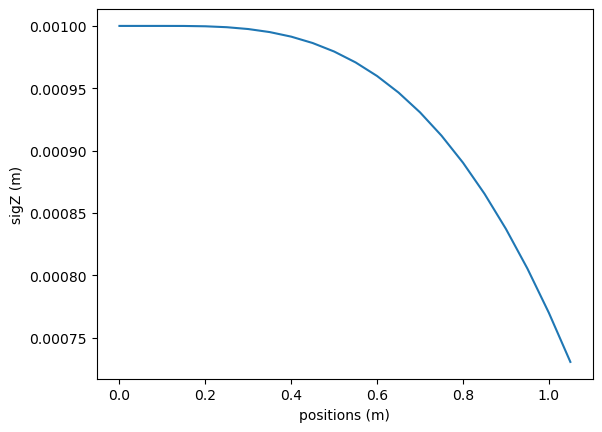

In [6]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 0.65 m, step count 13
ebeam energy 5000000029.237108


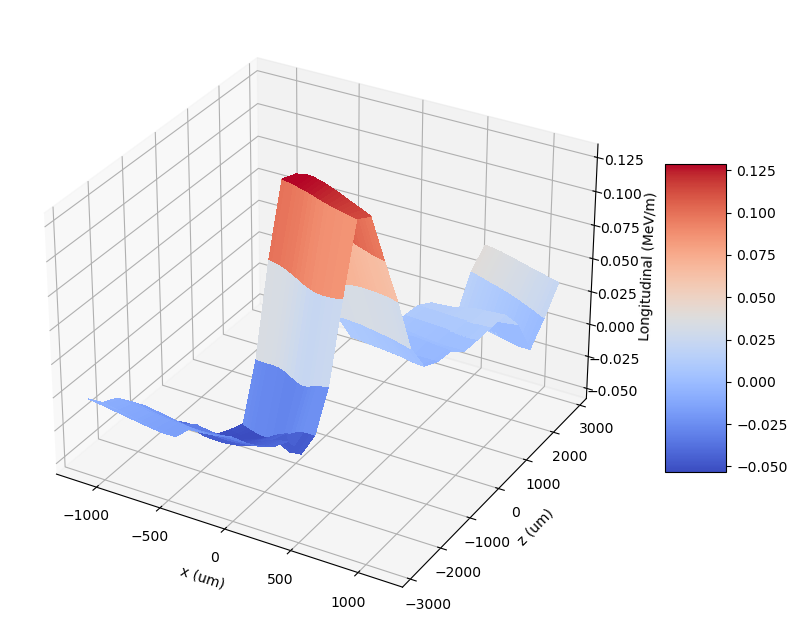

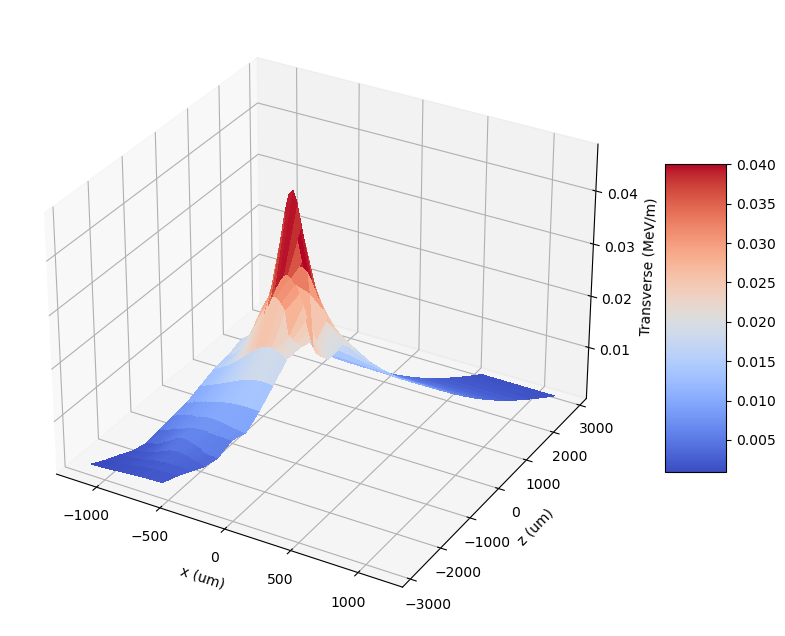

In [13]:
DFplot.plot_wakes(s = 0.7)

plot longitudinal wakes at nearest point s  = 0.5499999999999999 m, step count 11


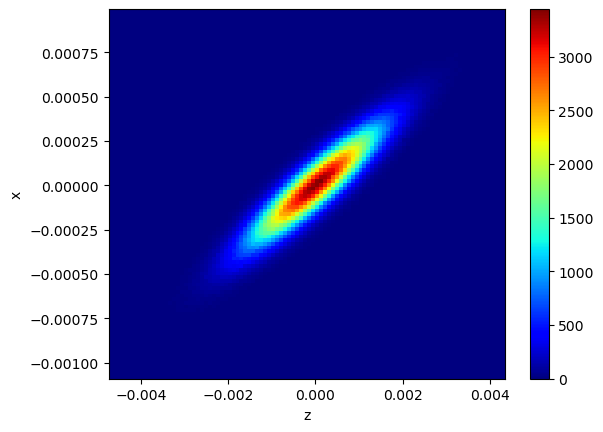

In [12]:
DFplot.plot_particles(s = 0.6, xkey = 'z', ykey = 'x')